In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def dyke_equation(x, z, d, theta, K, x0):
    term1 = K * (np.sin(theta) * (np.arctan2(x - x0 + d, z) - np.arctan2(x - x0 - d, z)))
    term2 = (np.cos(theta) / 2) * (np.log(((x - x0 + d) ** 2 + z ** 2) / ((x - x0 - d) ** 2 + z ** 2)))
    return term1 - term2

z_values = np.linspace(10, 70,100)  # Depth values
d = 10 #np.linspace(5, 20, 20)    # half Width values
theta_values = np.pi/6 # np.linspace(0, np.pi/2, 20)  # Inclination values
K =np.linspace(100, 400, 100)  #Effective Magnetisation Intensity
x0 =4 # np.linspace(0, 8, 50)   # x0 values
amp=[]
mean=[]
std=[]
x_values = np.linspace(-40, 40, 900)
magnetic_anomalies_matrix = np.zeros((100, 900))


for i in range(len(z_values)):  #getting magnetic data by varying z and K
        
        
        magnetic_anomalies = []
        for x in x_values:
            magnetic_anomalies.append(dyke_equation(x, z_values[i], d, theta_values, K[i], x0))
        magnetic_anomalies_matrix[i] = magnetic_anomalies
        amp.append(max(magnetic_anomalies_matrix[i,:]))
        mean.append(np.mean(magnetic_anomalies_matrix[i,:]))
        std.append(np.std(magnetic_anomalies_matrix[i,:]))


derivatives = abs(np.gradient(magnetic_anomalies_matrix, axis=1))

deriv_sum = derivatives.sum(axis=1)
        

    
df_sum_slope=pd.DataFrame({'sum_slope':deriv_sum})
df_std = pd.DataFrame({'std':std})
df_mean = pd.DataFrame({'mean':mean })
df_amp = pd.DataFrame({'amp':amp })
df_depth = pd.DataFrame({'Depth': z_values})
df_k = pd.DataFrame({'K': K})

df_combined = pd.concat([df_depth, df_k,df_amp,df_mean,df_std,df_sum_slope], axis=1)



df_combined.to_excel('test.xlsx', sheet_name='sheet1', index=False)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


data = pd.read_excel('test.xlsx')

X = data[[ 'amp', 'mean', 'std', 'sum_slope']]
y = data[['Depth','K']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)


data1= pd.read_excel('test1.xlsx')

X1= data1[[ 'amp', 'mean', 'std', 'sum_slope']]
y1= data1[['Depth','K']]

predictions = rf_regressor.predict(X1)
#print(X1)

#print(predictions)

0.9200749070747075


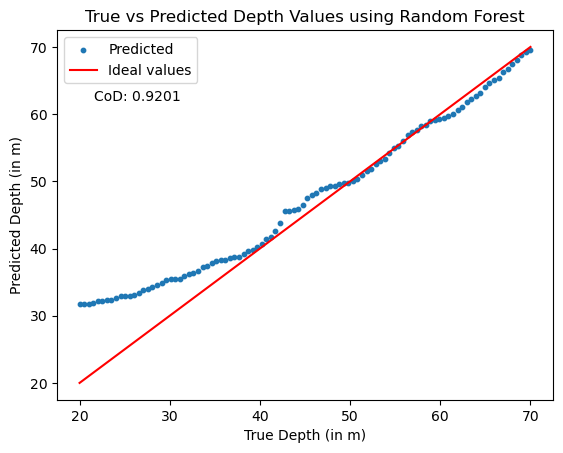

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Y10 = data1.iloc[:, 0]
Y11 = data1.iloc[:, 1]

r_squared = r2_score(Y10, predictions[:,0])
print(r_squared)

plt.scatter(Y10, predictions[:, 0], label='Predicted', marker='o', s=10)
plt.plot(Y10, Y10, color='red', label='Ideal values')
plt.xlabel('True Depth (in m)')
plt.ylabel('Predicted Depth (in m)')

plt.title('True vs Predicted Depth Values using Random Forest')
plt.text(plt.xlim()[1] - 0.75 * (plt.xlim()[1] - plt.xlim()[0]), plt.ylim()[0] + 0.8 * (plt.ylim()[1] - plt.ylim()[0]), f'CoD: {r_squared:.4f}', va='bottom', ha='right', fontsize=10)  
plt.legend()
plt.show()


In [111]:
    
df_pred1=pd.DataFrame({'k':predictions[:,0]})


df_combined = pd.concat([df_pred1], axis=1)

df_combined.to_excel('test_pred.xlsx', sheet_name='sheet2', index=False)

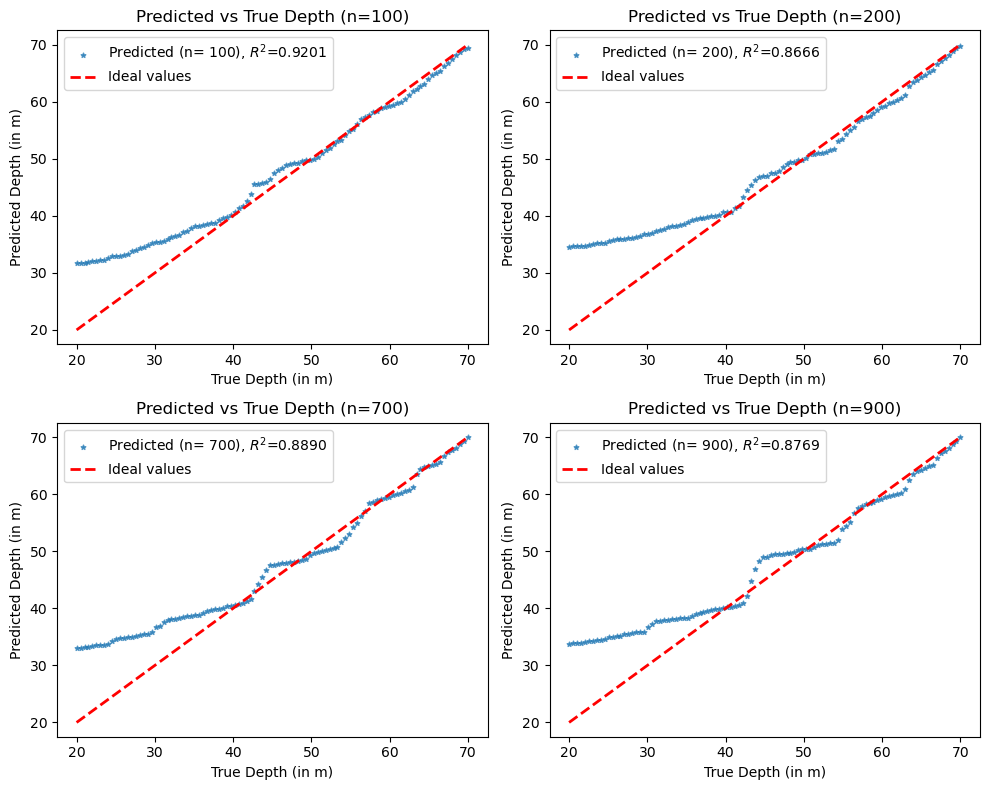

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

data2 = pd.read_excel('testpred.xlsx',sheet_name=1)

Y10 = data1.iloc[:, 0]
Y11 = data1.iloc[:, 1]

n = [100, 200, 700, 900]
r_squared_values = []

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flatten()):
    r_squared = r2_score(Y10, data2.iloc[:, i])
    r_squared_values.append(r_squared)
    ax.scatter(Y10, data2.iloc[:, i], label=f'Predicted (n= {n[i]}), $R^2$={r_squared:.4f}', marker='*', s=12, alpha=0.7)
    ax.plot(Y10, Y10, color='red', linestyle='--', label='Ideal values', linewidth=2)
    ax.set_xlabel('True Depth (in m)')
    ax.set_ylabel('Predicted Depth (in m)')
    ax.set_title(f'Predicted vs True Depth (n={n[i]})')
    ax.legend()

plt.tight_layout()

 
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd





def dyke_equation(x, z, d, theta, K, x0):
    term1 = K * (np.sin(theta) * (np.arctan2(x - x0 + d, z) - np.arctan2(x - x0 - d, z)))
    term2 = (np.cos(theta) / 2) * (np.log(((x - x0 + d) ** 2 + z ** 2) / ((x - x0 - d) ** 2 + z ** 2)))
    return term1 - term2

z_values = Y10  # Depth values

d = 10 #np.linspace(5, 20, 20)    # half Width values
theta_values = np.pi/6 # np.linspace(0, np.pi/2, 20)  # Inclination values
K =Y11  #Effective Magnetisation Intensity
x0 =4 # np.linspace(0, 8, 50)   # x0 values
amp=[]
mean=[]
std=[]
x_values = np.linspace(-40, 40, 900)
magnetic_anomalies_matrix1 = np.zeros((100, 900))


for i in range(len(z_values)):  
        
        
        magnetic_anomalies = []
        for x in x_values:
            magnetic_anomalies.append(dyke_equation(x, z_values[i], d, theta_values, K[i], x0))
        magnetic_anomalies_matrix1[i] = magnetic_anomalies



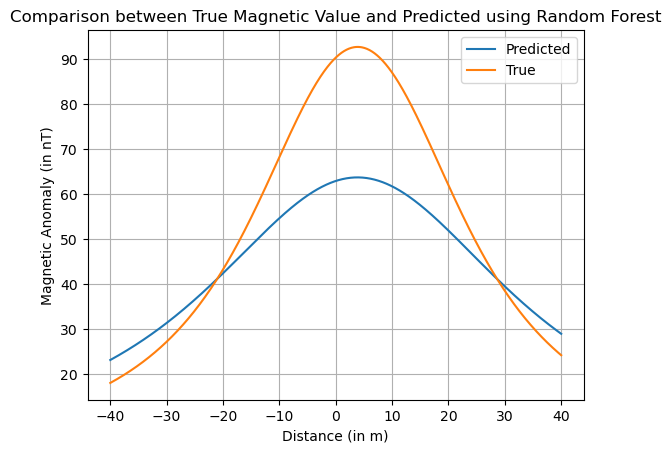

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def dyke_equation(x, z, d, theta, K, x0):
    term1 = K * (np.sin(theta) * (np.arctan2(x - x0 + d, z) - np.arctan2(x - x0 - d, z)))
    term2 = (np.cos(theta) / 2) * (np.log(((x - x0 + d) ** 2 + z ** 2) / ((x - x0 - d) ** 2 + z ** 2)))
    return term1 - term2

z_values = predictions[:,0]  # Depth values

d = 10 #np.linspace(5, 20, 20)    # half Width values
theta_values = np.pi/6 # np.linspace(0, np.pi/2, 20)  # Inclination values
K =predictions[:,1]  #Effective Magnetisation Intensity
x0 =4 # np.linspace(0, 8, 50)   # x0 values
amp=[]
mean=[]
std=[]
x_values = np.linspace(-40, 40, 900)
magnetic_anomalies_matrix = np.zeros((900, 900))


for i in range(len(z_values)):  #getting magnetic data by varying z and K
        
        
        magnetic_anomalies = []
        for x in x_values:
            magnetic_anomalies.append(dyke_equation(x, z_values[i], d, theta_values, K[i], x0))
        magnetic_anomalies_matrix[i] = magnetic_anomalies

plt.plot(x_values,magnetic_anomalies_matrix[0],label='Predicted')
plt.plot(x_values,magnetic_anomalies_matrix1[0],label='True')
plt.legend()
plt.title('Comparison between True Magnetic Value and Predicted using Random Forest')
plt.xlabel('Distance (in m)')
plt.ylabel('Magnetic Anomaly (in nT)')
plt.grid()
plt.show()

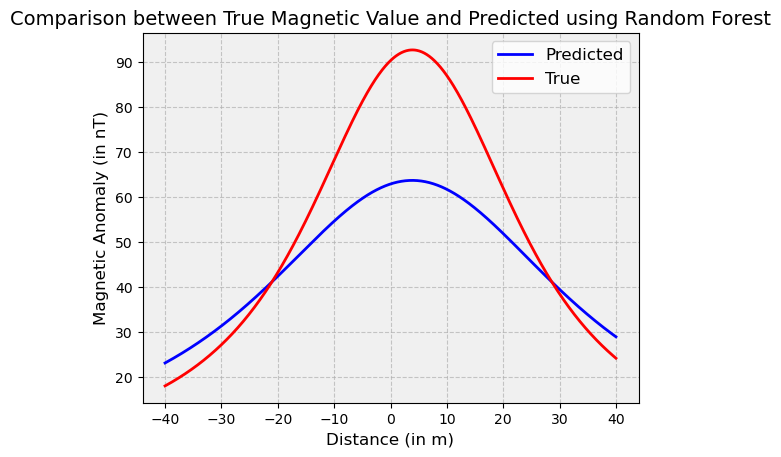

In [11]:
import matplotlib.pyplot as plt

plt.plot(x_values, magnetic_anomalies_matrix[0], label='Predicted', color='blue', linewidth=2)
plt.plot(x_values, magnetic_anomalies_matrix1[0], label='True', color='red', linewidth=2)

plt.title('Comparison between True Magnetic Value and Predicted using Random Forest', fontsize=14)
plt.xlabel('Distance (in m)', fontsize=12)
plt.ylabel('Magnetic Anomaly (in nT)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)

plt.gca().set_facecolor('#f0f0f0')

plt.show()


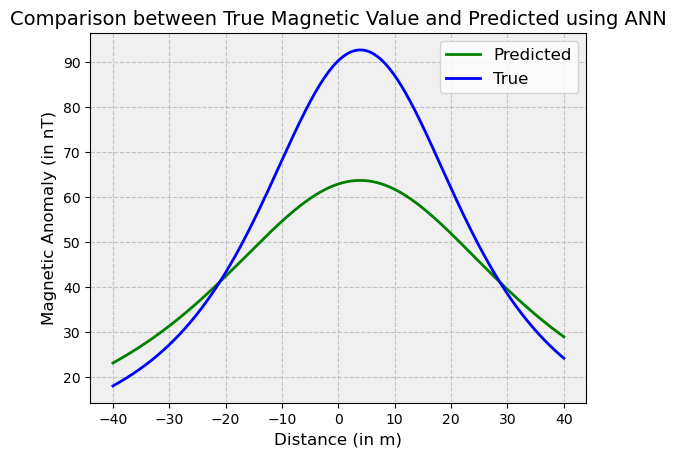

In [12]:
import matplotlib.pyplot as plt

plt.plot(x_values, magnetic_anomalies_matrix[0], label='Predicted', color='green', linewidth=2)
plt.plot(x_values, magnetic_anomalies_matrix1[0], label='True', color='blue', linewidth=2)

plt.title('Comparison between True Magnetic Value and Predicted using ANN', fontsize=14)
plt.xlabel('Distance (in m)', fontsize=12)
plt.ylabel('Magnetic Anomaly (in nT)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)


plt.gca().set_facecolor('#f0f0f0')

plt.show()
